## Simulation of usage

At each time stamp (when the app is running) users send their current location (x,y) to the server.<br>
The server maps these location to a tile on the map (ideally only streets).<br>
The server discards the location information when new is avaible, so it does NOT store any location history.

The server checks if multiple users are in the same tile (gropuby tile, count users) and builds a list of tiles containing multiple users:<br>
```
 [int: tile_n, list: user_ids]
 e.g.
 [[tile1, [user1, user2, user8]], 
  [tile18, [user3, user42],
  ...
 ]
``` 

The server then sends the list of user_ids to the users involved.<br>


The users, on their local device, build a list of "encounters" (contacts) as
```[(user1, time1), (user2, time1), (user14, time5), ...]```

When positive, the users send a message to the server, which maintains a list of positives with timestamps.

When the users update their contact history, they locally scan their contact history to find any (time-stamped) overlap with the list of positives received by the server. If there is a match they will send a positive signal to the server, which adds the user to the list of positives.

When the infected list is updated on the server, the server sends a request to all the users to check for matches in their contacts history.

In [1]:
import numpy as np
from source import Map, User, Server
from plotter import Plotter

np.random.seed(42)

In [2]:
n_users = 30
grid_size = 10
unlucky_user = 13
SAMPLE_USER = 1

# initial user positions
pos=np.random.uniform(0,1,(n_users, 2))
world_map = Map(grid_size)
plotter = Plotter(world_map)
server = Server(n_users, initial_pos=pos, world_map=world_map)

Location information store on server side

In [3]:
server.data.head()

,x,y,count,user_id,tile
0,0.374540,0.950714,1,0,38
1,0.731994,0.598658,1,1,65
2,0.156019,0.155995,1,2,11
3,0.058084,0.866176,1,3,7
4,0.601115,0.708073,1,4,56


In [4]:
# infect unlucky user
_ = server.add_infections(unlucky_user, t=1)

user 13 has been infected at time 1.


In [5]:
server.infected_users

{13: 1}

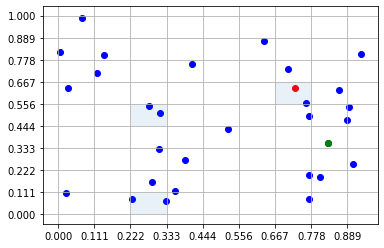

user 16 has been infected at time 1.

Information on Server side:
.   Infected users: {13: 1, 16: 1}
.   Collisions


tile
20    [11, 24]
24     [2, 21]
65    [13, 16]
Name: user_id, dtype: object


Information on User side (user_13)
.   Contact history
.    {16: [1]}
Information on User side (user_1)
.   Contact history
.    {}



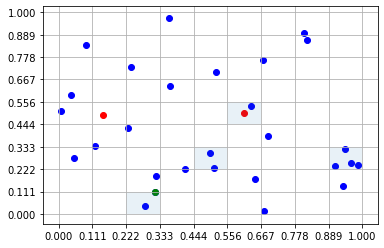

user 21 has been infected at time 2.

Information on Server side:
.   Infected users: {13: 1, 16: 1, 21: 2}
.   Collisions


tile
20            [1, 12]
42           [11, 26]
54           [13, 21]
82    [7, 10, 15, 17]
Name: user_id, dtype: object


Information on User side (user_13)
.   Contact history
.    {16: [1], 21: [2]}
Information on User side (user_1)
.   Contact history
.    {12: [2]}



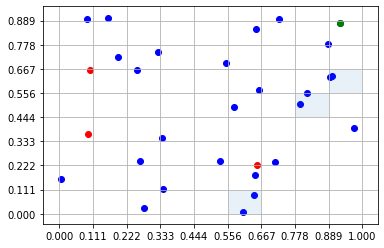


Information on Server side:
.   Infected users: {13: 1, 16: 1, 21: 2}
.   Collisions


tile
50    [10, 12]
74     [3, 25]
85     [6, 24]
Name: user_id, dtype: object


Information on User side (user_13)
.   Contact history
.    {16: [1], 21: [2]}
Information on User side (user_1)
.   Contact history
.    {12: [2]}



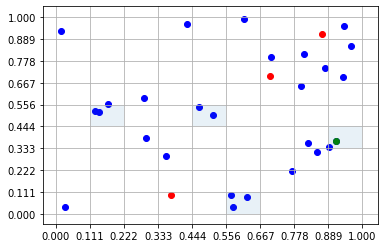


Information on Server side:
.   Infected users: {13: 1, 16: 1, 21: 2}
.   Collisions


tile
14       [11, 27]
44       [17, 23]
50    [9, 22, 29]
83        [1, 20]
Name: user_id, dtype: object


Information on User side (user_13)
.   Contact history
.    {16: [1], 21: [2]}
Information on User side (user_1)
.   Contact history
.    {12: [2], 20: [4]}



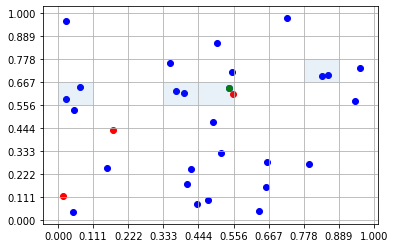

user 1 has been infected at time 5.

Information on Server side:
.   Infected users: {13: 1, 16: 1, 21: 2, 1: 5}
.   Collisions


tile
5     [27, 28]
35    [22, 24]
45     [1, 13]
76     [7, 18]
Name: user_id, dtype: object


Information on User side (user_13)
.   Contact history
.    {16: [1], 21: [2], 1: [5]}
Information on User side (user_1)
.   Contact history
.    {12: [2], 20: [4], 13: [5]}



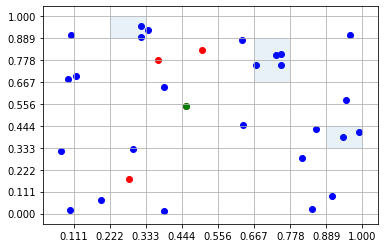


Information on Server side:
.   Infected users: {13: 1, 16: 1, 21: 2, 1: 5}
.   Collisions


tile
28    [22, 25]
66    [19, 29]
67    [12, 14]
83     [2, 15]
Name: user_id, dtype: object


Information on User side (user_13)
.   Contact history
.    {16: [1], 21: [2], 1: [5]}
Information on User side (user_1)
.   Contact history
.    {12: [2], 20: [4], 13: [5]}



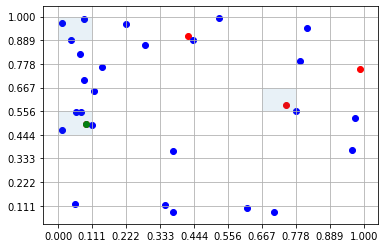

user 2 has been infected at time 7.
user 18 has been infected at time 7.
user 28 has been infected at time 7.
user 15 has been infected at time 7.

Information on Server side:
.   Infected users: {13: 1, 16: 1, 21: 2, 1: 5, 2: 7, 18: 7, 28: 7, 15: 7}
.   Collisions


tile
4     [1, 2, 18, 28]
8       [10, 25, 26]
65          [15, 21]
Name: user_id, dtype: object


Information on User side (user_13)
.   Contact history
.    {16: [1], 21: [2], 1: [5]}
Information on User side (user_1)
.   Contact history
.    {12: [2], 20: [4], 13: [5], 2: [7], 18: [7], 28: [7]}



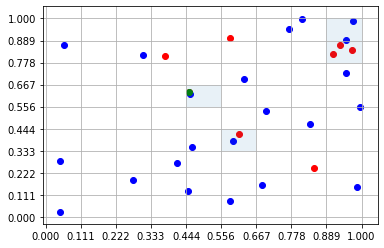

user 5 has been infected at time 8.
user 20 has been infected at time 8.

Information on Server side:
.   Infected users: {13: 1, 16: 1, 21: 2, 1: 5, 2: 7, 18: 7, 28: 7, 15: 7, 5: 8, 20: 8}
.   Collisions


tile
45          [1, 5]
53        [15, 20]
87    [13, 16, 21]
88          [4, 9]
Name: user_id, dtype: object


Information on User side (user_13)
.   Contact history
.    {16: [1, 8], 21: [2, 8], 1: [5]}
Information on User side (user_1)
.   Contact history
.    {12: [2], 20: [4], 13: [5], 2: [7], 18: [7], 28: [7], 5: [8]}



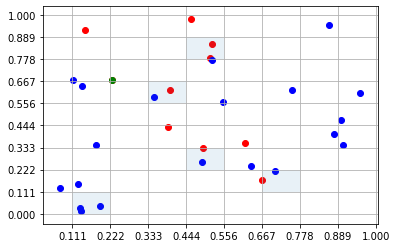

user 12 has been infected at time 9.
user 19 has been infected at time 9.
user 10 has been infected at time 9.

Information on Server side:
.   Infected users: {13: 1, 16: 1, 21: 2, 1: 5, 2: 7, 18: 7, 28: 7, 15: 7, 5: 8, 20: 8, 12: 9, 19: 9, 10: 9}
.   Collisions


tile
10    [8, 11, 29]
35       [12, 16]
42       [19, 21]
47        [5, 15]
61       [10, 28]
Name: user_id, dtype: object


Information on User side (user_13)
.   Contact history
.    {16: [1, 8], 21: [2, 8], 1: [5]}
Information on User side (user_1)
.   Contact history
.    {12: [2], 20: [4], 13: [5], 2: [7], 18: [7], 28: [7], 5: [8]}



In [6]:
for time_step in range(1,10):
    new_pos = np.random.uniform(0,1,(n_users, 2))
    server.update_pos(new_pos)
    collisions = server.find_collisions()
    plotter.plot_with_patches(collisions, server, sample_user_id=SAMPLE_USER)
    new_infections = server.check_infection_groups(collisions, time_step=time_step)
    print()
    print('Information on Server side:')
    print('.   Infected users:',server.infected_users)
    print('.   Collisions')
    display(collisions)
    print()
    print(f'Information on User side (user_{unlucky_user})')
    print(f'.   Contact history')
    print(f'.   ', server.users[unlucky_user].contacts)
    print(f'Information on User side (user_{SAMPLE_USER})')
    print(f'.   Contact history')
    print(f'.   ', server.users[SAMPLE_USER].contacts)
    print()